<a href="https://colab.research.google.com/github/fsajad9/Armijo_line/blob/main/Momenton_Adag_SGD_RMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
from matplotlib import pyplot as plt

In [37]:
class Mon:
  def __init__(self,x,y,w):
    self.x=x
    self.y=y
    self.w=w
  def error(self):
    return np.dot(self.w,self.x)-self.y  

  def loss(self):
    return (self.error()**2).mean()
  def grad_w(self):
    return (2*self.x*self.error()).mean(1)
  def new_point(self,alp,serch):
    return self.w-alp*serch

In [38]:

def ste_siz(x,y,w,beta,c,loss,grad_w,alpha):

  w1=w-alpha*grad_w
  yhat=np.dot(w1,x)
  error=yhat-y
  loss_new=(error**2).mean()
  no=np.linalg.norm(grad_w)
  for i in range(10):
    if loss_new<=loss-alpha*c*no**2:
      break
    alpha=alpha*beta
    w1=w-alpha*grad_w
    error=np.dot(w1,x)-y
    loss_new=(error**2).mean()
  alpha=min(1,alpha)  
  return alpha    





In [39]:
def momenton(n_epoch,x,y,c,beta,gamma,w,alpha):
  losses=[]
  for i in range(n_epoch):
    m1=np.random.randint(0,n,int(n/5))
    x1=x[:,m1]
    y1=y[:,m1]
    mm=Mon(x1,y1,w)
    los=mm.loss()
    losses.append(los)
    grad=mm.grad_w()
    if i==0:
      sr=grad
    else:
      sr=gamma*sr1+(1-gamma)*grad
    alp=ste_siz(x,y,w,beta,c,los,sr,alpha)
    sr1=sr    

    w=mm.new_point(alp,sr)

    alpha=2*alp
  return losses



In [40]:
def non_momenton(n_epoch,x,y,c,beta,gamma,w,alpha):
  losses=[]
  for i in range(n_epoch):
    m1=np.random.randint(0,n,int(n/5))
    x1=x[:,m1]
    y1=y[:,m1]
    mm=Mon(x1,y1,w)
    los=mm.loss()
    losses.append(los)
    grad=mm.grad_w()
    sr=grad

    alp=ste_siz(x,y,w,beta,c,los,sr,alpha)
  

    w=mm.new_point(alp,sr)

    alpha=2*alp
  return losses


In [103]:
def adag(n_epoch,x,y,c,beta,gamma,w,alpha,D):
  losses=[]
  for i in range(n_epoch):
    m1=np.random.randint(0,n,int(n/5))
    x1=x[:,m1]
    y1=y[:,m1]
    mm=Mon(x1,y1,w)
    los=mm.loss()
    losses.append(los)
    grad=mm.grad_w()
    D=D+grad*grad
    
    sr=np.sqrt(1/D)
    sr1=sr*grad
    
    


    alp=ste_siz(x,y,w,beta,c,los,sr1,alpha)
  
    
    w=mm.new_point(alp,sr1)

    alpha=2*alp
  return losses


In [108]:
def rms(n_epoch,x,y,c,beta,gamma1,w,alpha,D):
  losses=[]
  for i in range(n_epoch):
    m1=np.random.randint(0,n,int(n/5))
    x1=x[:,m1]
    y1=y[:,m1]
    mm=Mon(x1,y1,w)
    los=mm.loss()
    losses.append(los)
    grad=mm.grad_w()
   
    D1=gamma1*(D*D)+(1-gamma1)*(grad*grad)
    
    k1=np.sqrt(D1)
    D=k1
    sr1=(1/k1)*grad
    
    


    alp=ste_siz(x,y,w,beta,c,los,sr1,alpha)
  
    
    w=mm.new_point(alp,sr1)

    alpha=2*alp
  return losses

def lose(x,y):
    mi=min(x)
    return y-mi

In [159]:
## Initial value
np.random.seed(42)
n=1000
d=20
xx=np.random.rand(d,n)
x11=np.ones((1,n),dtype=float)
x=np.concatenate((x11,xx))
w_0=2*np.ones((1,d+1))
eps=np.random.randn(1,n)
y=np.dot(w_0,x)+.01*eps
w=np.random.randn(1,d+1)
n_epoch=500
D=np.zeros((1,d+1))
c=.1
beta=.75
alpha=.5
gamma=.1
gamma1=.95

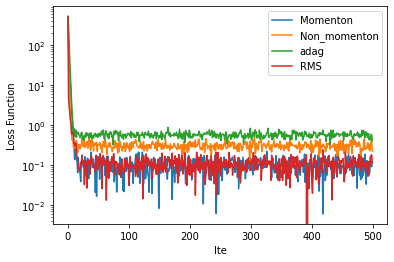

In [160]:
losses_momenton=momenton(n_epoch,x,y,c,beta,gamma,w,alpha)
min_mom=min(losses_momenton)


losses_non_momenton=non_momenton(n_epoch,x,y,c,beta,gamma,w,alpha)
min_non_mom=min(losses_non_momenton)


losses_adag=adag(n_epoch,x,y,c,beta,gamma,w,alpha,D)
min_adag=min(losses_adag)


losses_rms=rms(n_epoch,x,y,c,beta,gamma1,w,alpha,D)
min_rms=min(losses_rms)


lo=[min_mom,min_non_mom,min_adag,min_rms]

losses_momenton=lose(lo,losses_momenton)
plt.plot(losses_momenton,label='Momenton')


losses_non_momenton=lose(lo,losses_non_momenton)
plt.plot(losses_non_momenton, label="Non_momenton")

losses_adag=lose(lo,losses_adag)
plt.plot(losses_adag, label="adag")

losses_rms=lose(lo,losses_rms)
plt.plot(losses_rms, label="RMS")


plt.legend()
plt.yscale('log')
plt.ylabel('Loss Function')
plt.xlabel('Ite')
plt.show()




